[autoreload of naml.text failed: Traceback (most recent call last):
  File "c:\Users\mos9527\naml\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 283, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\mos9527\naml\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 483, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\Users\mos9527\miniconda3\Lib\importlib\__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 999, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "C:\Users\mos9527\naml\naml\text.py", line 115, in <module>
    from naml.sequence import seq_partition_sample_1D_sequential_iter
ImportError: cannot import name 'seq_partition_sample_1D_sequential_iter' from 'naml.sequence' (C:\Users\mos9527\naml\naml\sequence.py)
]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


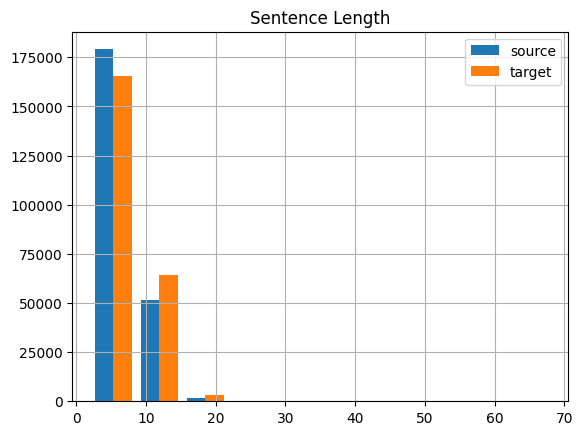

In [30]:
%load_ext autoreload
%autoreload 2
from naml.dataset import Datasets, DatasetRemote
from naml.text import tokenize_line
datasets = Datasets("~/naml-data")
table = datasets.fetch(DatasetRemote(
    "fra-eng", "https://www.manythings.org/anki/fra-eng.zip"
)).as_zip().read('fra.txt').decode('utf-8').lower()

num_examples = -1
lines = table.split('\n')[:num_examples]
lines = [line.split('\t')[:2] for line in lines]
lines = [line for line in lines if len(line) == 2]
src_words, target_words = [line[0] for line in lines], [line[-1] for line in lines]
src_words = [list(tokenize_line(line, '!.:;?',' ')) for line in src_words]
target_words = [list(tokenize_line(line, '!.:;?',' ')) for line in target_words]
from naml import plot
plot.histogram(
    [[len(x) for x in src_words],[len(x) for x in target_words]],
    legend=['source', 'target'],
    title='Sentence Length',    
)


In [31]:
from naml.text import Vocabulary
corpus = Vocabulary.to_corpus(src_words)
vocab = Vocabulary(corpus, min_freq=2)
print(len(vocab))

13109


In [32]:
print(src_words[0])
vocab.truncate_pad(vocab.to_indices(src_words[0]), 10)

['go', '.']


tensor([46,  3,  1,  1,  1,  1,  1,  1,  1,  1])

In [33]:
src_corpus, tgt_corpus = Vocabulary.to_corpus(src_words), Vocabulary.to_corpus(target_words)
src_vocab, tgt_vocab = Vocabulary(src_corpus), Vocabulary(tgt_corpus)
from naml.text import pair_vocab_batch_sample_iter

for x, x_len, y, y_len in pair_vocab_batch_sample_iter(src_vocab, tgt_vocab, src_words, target_words, 2, 8):
    print(x, x_len, y, y_len,sep='\n')
    for i in range(len(x)):
        print(src_vocab.to_tokens(x[i][:x_len[i]]), tgt_vocab.to_tokens(y[i][:y_len[i]]),sep='\n')
    break
    

tensor([[46,  3,  1,  1,  1,  1,  1,  1],
        [46,  3,  1,  1,  1,  1,  1,  1]])
tensor([2, 2])
tensor([[103,  35,   1,   1,   1,   1,   1,   1],
        [821,   3,   1,   1,   1,   1,   1,   1]])
tensor([2, 2])
['go', '.']
['va', '!']
['go', '.']
['marche', '.']
